## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier



## Importing Dataset

In [2]:
dataset = pd.read_csv('UDACITY3.csv')
dataset.head()

,Symbol,Date,Time,MA5CrossHappened,MA5CrossHappened Label,5DayGained,5DayGained Label,MaxTwoDayVolumeRatio,MaxTwoDayVolumeRatio Label,PositiveMACDdays,...,GainVolume100Ratio,GainVolume100Ratio Label,GoldenBarCount,GoldenBarCount Label,MA5LifeLine,MA5LifeLine Label,MA5Low,MA5Low Label,MA5High,MA5High Label
0,GUT,5/15/2017,4:00 PM,1.0,NaN,0.0,NaN,1.49,NaN,0,...,1.07119,NaN,0,NaN,1.036753,NaN,1.018045,NaN,1.029542,NaN
1,GUT,5/16/2017,4:00 PM,0.0,NaN,0.0,NaN,0.00,NaN,0,...,0.00000,NaN,0,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
2,GUT,5/17/2017,4:00 PM,0.0,NaN,0.0,NaN,0.00,NaN,0,...,0.00000,NaN,0,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
3,GUT,5/18/2017,4:00 PM,0.0,NaN,0.0,NaN,0.00,NaN,0,...,0.00000,NaN,0,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
4,GUT,5/19/2017,4:00 PM,0.0,NaN,0.0,NaN,0.00,NaN,0,...,0.00000,NaN,0,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457356 entries, 0 to 2457355
Data columns (total 33 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Symbol                       object 
 1   Date                         object 
 2   Time                         object 
 3   MA5CrossHappened             float64
 4   MA5CrossHappened Label       float64
 5   5DayGained                   float64
 6   5DayGained Label             float64
 7   MaxTwoDayVolumeRatio         float64
 8   MaxTwoDayVolumeRatio Label   float64
 9   PositiveMACDdays             int64  
 10  PositiveMACDdays Label       float64
 11  GainBarsSum                  float64
 12  GainBarsSum Label            float64
 13  SignificantGainVolume        int64  
 14  SignificantGainVolume Label  float64
 15  MACDdivergeRatio             float64
 16  MACDdivergeRatio Label       float64
 17  MACDdivergeRatioLow          float64
 18  MACDdivergeRatioLow Label    float64
 19  

In [4]:
dataset.describe()

,MA5CrossHappened,MA5CrossHappened Label,5DayGained,5DayGained Label,MaxTwoDayVolumeRatio,MaxTwoDayVolumeRatio Label,PositiveMACDdays,PositiveMACDdays Label,GainBarsSum,GainBarsSum Label,...,GainVolume100Ratio,GainVolume100Ratio Label,GoldenBarCount,GoldenBarCount Label,MA5LifeLine,MA5LifeLine Label,MA5Low,MA5Low Label,MA5High,MA5High Label
count,2.456606e+06,0.0,2.455013e+06,0.0,2457355.0,0.0,2.457356e+06,0.0,2.452641e+06,0.0,...,2456627.0,0.0,2.457356e+06,0.0,2454633.0,0.0,2.457137e+06,0.0,2.457136e+06,0.0
mean,2.203772e-02,NaN,1.063986e-02,NaN,inf,NaN,1.136921e-01,NaN,7.064589e-02,NaN,...,inf,NaN,7.641546e-03,NaN,inf,NaN,2.465887e-02,NaN,2.462167e-02,NaN
std,1.468062e-01,NaN,1.025995e-01,NaN,NaN,NaN,1.243855e+00,NaN,4.918982e-01,NaN,...,NaN,NaN,4.586384e-01,NaN,NaN,NaN,1.808026e-01,NaN,1.935430e-01,NaN
min,0.000000e+00,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN,...,0.0,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN
25%,0.000000e+00,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN,...,0.0,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN
50%,0.000000e+00,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN,...,0.0,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN
75%,0.000000e+00,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN,...,0.0,NaN,0.000000e+00,NaN,0.0,NaN,0.000000e+00,NaN,0.000000e+00,NaN
max,1.000000e+00,NaN,1.000000e+00,NaN,inf,NaN,1.040000e+02,NaN,5.000000e+00,NaN,...,inf,NaN,1.300000e+02,NaN,inf,NaN,2.289474e+01,NaN,1.300000e+02,NaN


## Wrangling Dataset

In [5]:
df_copy1 = dataset.drop(columns = ['Symbol', 'Date', 'Time', 'MA5CrossHappened Label', '5DayGained Label', 'MaxTwoDayVolumeRatio Label', 'PositiveMACDdays Label'])
df_copy2 = df_copy1.drop(columns = ['GainBarsSum Label', 'SignificantGainVolume Label', 'MACDdivergeRatio Label', 'MACDdivergeRatioLow Label', 'Cross100Ratio Label'])
df_copy3 = df_copy2.drop(['Cross5to100Ratio Label', 'GainVolume100Ratio Label', 'GoldenBarCount Label', 'MA5LifeLine Label', 'MA5Low Label', 'MA5High Label'], axis=1)


In [6]:
df_copy4 = df_copy3[df_copy3.MA5CrossHappened != 0]
df_copy5 = df_copy4.replace([np.inf, -np.inf], np.nan)
df_copy5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54888 entries, 0 to 2457351
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MA5CrossHappened       54138 non-null  float64
 1   5DayGained             54888 non-null  float64
 2   MaxTwoDayVolumeRatio   50892 non-null  float64
 3   PositiveMACDdays       54888 non-null  int64  
 4   GainBarsSum            54888 non-null  float64
 5   SignificantGainVolume  54888 non-null  int64  
 6   MACDdivergeRatio       50277 non-null  float64
 7   MACDdivergeRatioLow    50085 non-null  float64
 8   Cross100Ratio          54884 non-null  float64
 9   Cross5to100Ratio       54868 non-null  float64
 10  GainVolume100Ratio     54145 non-null  float64
 11  GoldenBarCount         54888 non-null  int64  
 12  MA5LifeLine            52164 non-null  float64
 13  MA5Low                 54669 non-null  float64
 14  MA5High                54668 non-null  float64
dtype

In [7]:
df_clean = df_copy5.dropna(how = 'any', subset = ['MA5CrossHappened'])

In [8]:
df_clean1 = df_clean.drop(columns = ['MA5CrossHappened'])
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54138 entries, 0 to 2457351
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   5DayGained             54138 non-null  float64
 1   MaxTwoDayVolumeRatio   50142 non-null  float64
 2   PositiveMACDdays       54138 non-null  int64  
 3   GainBarsSum            54138 non-null  float64
 4   SignificantGainVolume  54138 non-null  int64  
 5   MACDdivergeRatio       49527 non-null  float64
 6   MACDdivergeRatioLow    49335 non-null  float64
 7   Cross100Ratio          54134 non-null  float64
 8   Cross5to100Ratio       54118 non-null  float64
 9   GainVolume100Ratio     53395 non-null  float64
 10  GoldenBarCount         54138 non-null  int64  
 11  MA5LifeLine            51414 non-null  float64
 12  MA5Low                 53919 non-null  float64
 13  MA5High                53918 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 6.2 MB


In [9]:
fill_mean = lambda col: col.fillna(col.mean())
df_final = df_clean1.apply(fill_mean, axis=0)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54138 entries, 0 to 2457351
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   5DayGained             54138 non-null  float64
 1   MaxTwoDayVolumeRatio   54138 non-null  float64
 2   PositiveMACDdays       54138 non-null  int64  
 3   GainBarsSum            54138 non-null  float64
 4   SignificantGainVolume  54138 non-null  int64  
 5   MACDdivergeRatio       54138 non-null  float64
 6   MACDdivergeRatioLow    54138 non-null  float64
 7   Cross100Ratio          54138 non-null  float64
 8   Cross5to100Ratio       54138 non-null  float64
 9   GainVolume100Ratio     54138 non-null  float64
 10  GoldenBarCount         54138 non-null  int64  
 11  MA5LifeLine            54138 non-null  float64
 12  MA5Low                 54138 non-null  float64
 13  MA5High                54138 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 6.2 MB


## Splitting the dataset into the Training set and Test set

In [10]:
X = df_final.iloc[:, 1:].values
y = df_final.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


## Feature Scaling

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



## Training the Kernel SVM model on the Training set

In [12]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3401 3548]
 [2277 4309]]


## Applying k-Fold Cross Validation

In [15]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 56.99 %
Standard Deviation: 0.63 %


## Training the Random Forest Classfication model on the Training set

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [38]:
y_pred = classifier1.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4448 2501]
 [2570 4016]]


In [40]:
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 61.90 %
Standard Deviation: 0.51 %


## Training the K-NN model on the Training set

In [41]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred = classifier2.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3828 3121]
 [3027 3559]]


In [44]:
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 54.15 %
Standard Deviation: 0.47 %


## Training the Logistic Regression model on the Training set

In [45]:
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = classifier3.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4789 2160]
 [4246 2340]]


In [49]:
accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 53.73 %
Standard Deviation: 0.87 %


## Data Visualization

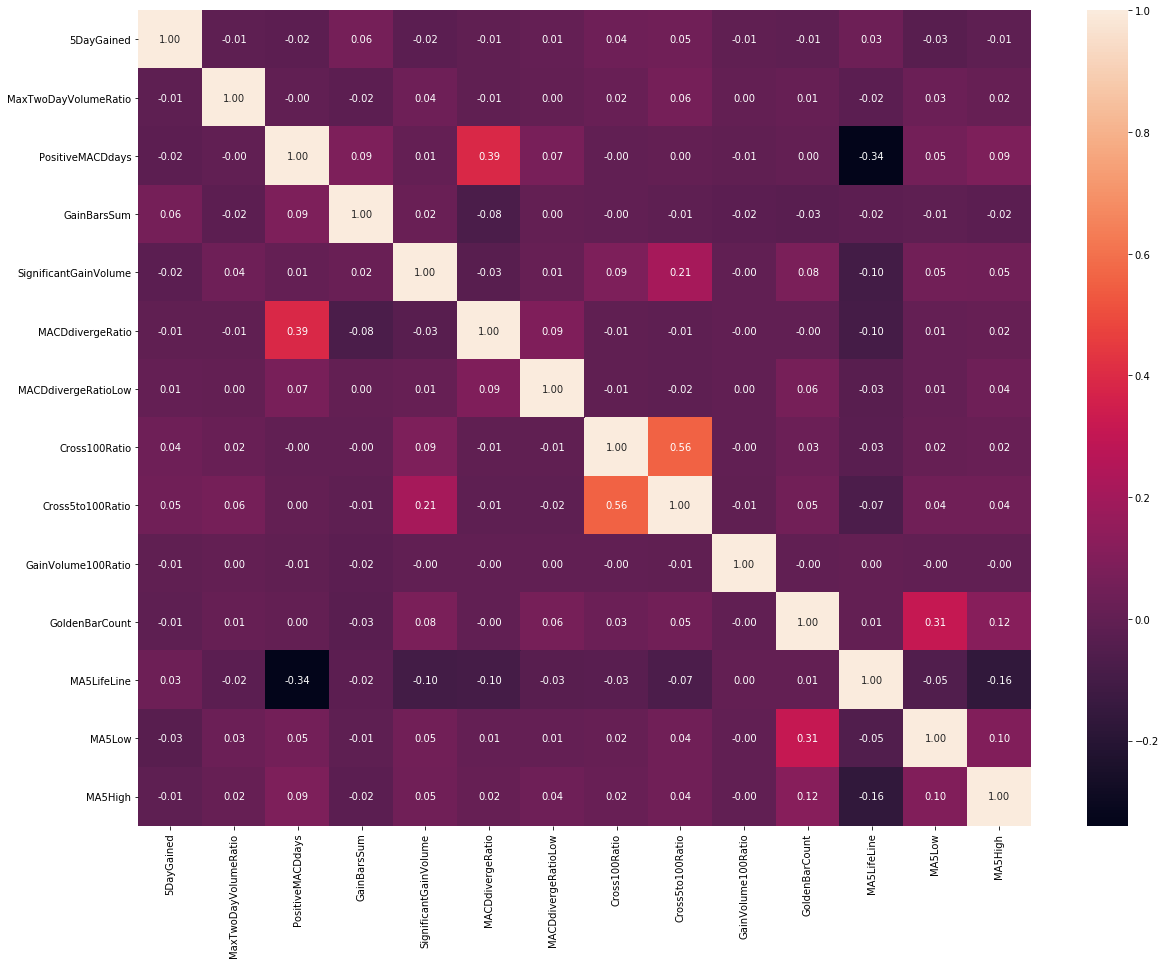

In [52]:
# Correlation Heat Map
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df_final.corr(), annot=True, fmt=".2f");

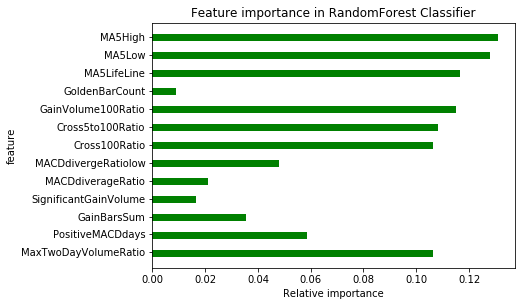

<Figure size 360x360 with 0 Axes>

In [62]:
# Feature importance in RandomForest Classifier
col = ['MaxTwoDayVolumeRatio', 'PositiveMACDdays', 'GainBarsSum', 'SignificantGainVolume', 'MACDdiverageRatio', 
       'MACDdivergeRatioLow', 'Cross100Ratio', 'Cross5to100Ratio', 'GainVolume100Ratio', 'GoldenBarCount', 'MA5LifeLine', 
       'MA5Low', 'MA5High']
#modelname.feature_importance_
imp = classifier1.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(imp)) # the x locations for the groups
ax.barh(ind, imp, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

## Training the Random Forest Classfication model on the Training set with feature selection

In [90]:
df_select = df_final.drop(columns = ['GoldenBarCount', 'MACDdivergeRatio', 'SignificantGainVolume'])

In [91]:
X1 = df_select.iloc[:, 1:].values
y1 = df_select.iloc[:, 0].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 0)

In [92]:
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)


In [93]:
from sklearn.ensemble import RandomForestClassifier
classifierSlct = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifierSlct.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [94]:
y_pred1 = classifierSlct.predict(X_test1)

In [95]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)
print(cm)

[[4417 2532]
 [2578 4008]]


In [96]:
accuracies = cross_val_score(estimator = classifierSlct, X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.01 %
Standard Deviation: 0.52 %


## Data Visualization Continued

In [112]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54138 entries, 0 to 2457351
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   5DayGained            54138 non-null  float64
 1   MaxTwoDayVolumeRatio  54138 non-null  float64
 2   PositiveMACDdays      54138 non-null  int64  
 3   GainBarsSum           54138 non-null  float64
 4   MACDdivergeRatioLow   54138 non-null  float64
 5   Cross100Ratio         54138 non-null  float64
 6   Cross5to100Ratio      54138 non-null  float64
 7   GainVolume100Ratio    54138 non-null  float64
 8   MA5LifeLine           54138 non-null  float64
 9   MA5Low                54138 non-null  float64
 10  MA5High               54138 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.0 MB


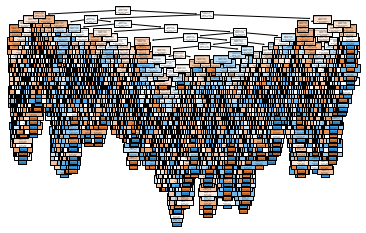

In [116]:
# Visualizting a sample tree frome forest classifier
fn = ['MaxTwoDayVolumeRatio', 'PositiveMACDdays', 'GainBarsSum', 'MACDdivergeRatioLow', 
                                 'Cross100Ratio', 'Cross5to100Ratio', 'GainVolume100Ratio', 'MA5LifeLine', 
                                 'MA5Low', 'MA5High']
cn = ['False', 'True']
from sklearn.tree import export_graphviz
from sklearn import tree
Tre = classifierSlct.estimators_[5]
tree.plot_tree(Tre,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')


imagename.png
